# **Appliances Energy Prediction**

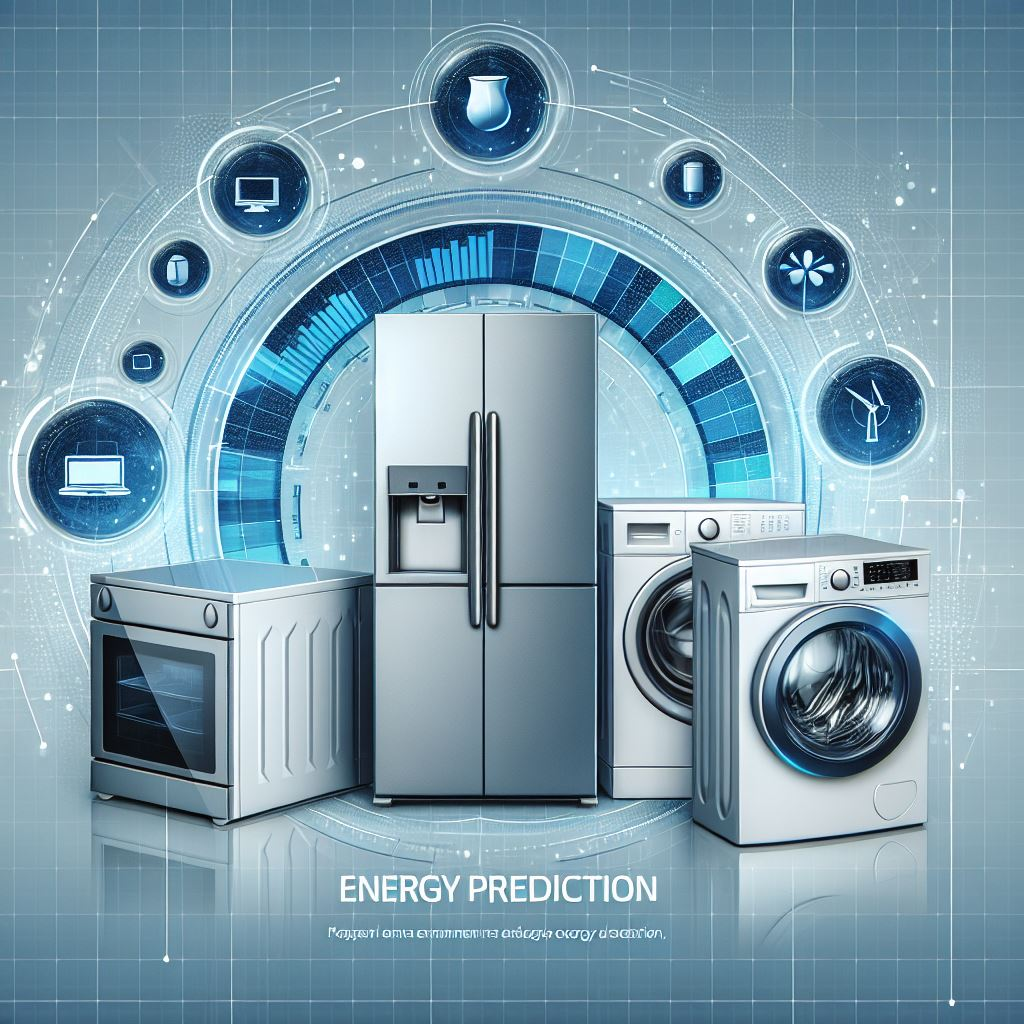

In [10]:
Image(filename='AEP.jpeg')

# Table of Contents : 
1. Introduction
2. Goal Of the Project
3. Data Story
4. Data Preprocessing
5. Model Training & Evaluation
6. Model Optimization
7. Pipeline

# **1. Introduction**

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).

**2. Goal of the Project**

Predicting Top 10 Important Features Affecting Appliance Energy Use

# **3. Data Story/Source**

energydata_complete.csv consists of 29 columns & 19735 rows


**TOOLS USED**

Libraries:

import sklearn: Imports the scikit-learn library, commonly used for machine learning.

import pandas as pd: Imports pandas for data manipulation and analysis.

import numpy as np: Imports NumPy for numerical computing.

import matplotlib.pyplot as plt: Imports Matplotlib for plotting graphs and visualizations.

import seaborn as sns: Imports Seaborn for statistical data visualization.

from IPython.display import Image: Imports functionality to display images in Jupyter Notebooks.

from sklearn.model_selection import train_test_split, cross_val_score: Imports tools for splitting data and cross-validation.

from sklearn.feature_selection import RFE: Imports Recursive Feature Elimination for feature selection.

from imblearn.over_sampling import SMOTE: Imports SMOTE for handling imbalanced datasets by oversampling.

from sklearn.preprocessing import LabelEncoder: Imports LabelEncoder for converting categorical labels to numerical values.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc: Imports various metrics for evaluating model performance.

from sklearn.tree import DecisionTreeClassifier: Imports the DecisionTreeClassifier for building decision tree models.

from xgboost import XGBClassifier: Imports XGBClassifier for gradient boosting with XGBoost.

from lightgbm import LGBMClassifier: Imports LGBMClassifier for LightGBM gradient boosting.

from sklearn.ensemble import RandomForestClassifier: Imports RandomForestClassifier for building random forest models.

from sklearn.ensemble import GradientBoostingClassifier: Imports GradientBoostingClassifier for gradient boosting models.

from imblearn.pipeline import Pipeline: Imports Pipeline from imbalanced-learn for building machine learning pipelines.

from sklearn.compose import ColumnTransformer: Imports ColumnTransformer for applying different transformations to columns.

from sklearn.model_selection import GridSearchCV: Imports GridSearchCV for hyperparameter tuning using cross-validation.

import joblib: Imports joblib for saving and loading Python objects, typically models.

Methods / Functions:

pd.read_csv() – Loads data from a CSV file.

df.select_dtypes() – Selects columns based on data types.

train_test_split() – Splits data into training and testing sets.

drop() – Removes unwanted columns.

sns.boxplot() / sns.countplot() / sns.heatmap() / sns.pairplot() – Various plots for EDA.

Skewness – Measures the asymmetry of the distribution of data in a feature.

Capping method – Limits extreme outlier values in a feature using statistical thresholds like IQR.

Log transformation method – Applies logarithmic scaling to reduce skewness and stabilize variance in data.

Label encoding – Converts categorical labels into numerical values for machine learning models.

Correlation matrix – Displays the pairwise correlation between features to identify relationships.

SMOTE – Synthesizes new samples of the minority class to balance imbalanced datasets.

Feature Selection (RFE with Random Forest) – Iteratively removes less important features using a Random Forest estimator.

Random Forest Classifier – An ensemble model that builds multiple decision trees and aggregates their predictions.

XGBoost Classifier – An optimized gradient boosting algorithm known for speed and performance in structured data tasks.

Light GBM Classifier – A high-performance, fast gradient boosting algorithm optimized for large datasets.

Decision Tree Classifier – A model that splits data based on feature thresholds to classify outcomes.

Gradient Boosting Classifier – Builds models sequentially to correct the errors of previous ones using boosting.

Accuracy – Measures the percentage of correctly predicted instances out of all predictions.

Precision – Represents the ratio of correctly predicted positive observations to total predicted positives.

F1 Score – The harmonic mean of precision and recall, balancing both in a single metric.

Recall – The ratio of correctly predicted positive cases to all actual positives.

Cross Validation – A technique to assess model performance by splitting data into multiple train-test folds.

ROC and AUC – ROC plots true positive rate vs. false positive rate; AUC quantifies the model’s classification ability.

Pipeline – Chains preprocessing and modeling steps into a single object to streamline workflows.

Hyperparameter tuning – Optimizes model settings to improve performance.


# **Data Preprocessing**



**I.Importing Libraries**

In [44]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [45]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
import joblib

In [46]:
# Load the dataset
file_path = "energydata_complete.csv"
df = pd.read_csv(file_path)

In [47]:
# Display basic information and the first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

(None,
                   date  Appliances  lights     T1       RH_1    T2       RH_2  \
 0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
 1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
 2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
 3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
 4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   
 
       T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
 0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
 1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
 2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
 3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
 4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   
 
    RH_out 

In [48]:
# Rows & Columns
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [49]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [50]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

**IV.Handle Missing Data**

In [51]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


After checking the missing values in the dataframe, it shows there are no missing values.

**V.Handle Duplicates**

In [29]:
df.duplicated().sum()

0

After checking the missing values in the dataframe, it shows there are no Duplicates values.

In [57]:
# Drop irrelevant columns
df_cleaned = df.drop(columns=['date', 'rv1', 'rv2'])


**VI.Exploratory Data Analysis: Visualizing Insights with Diverse Graph Types**

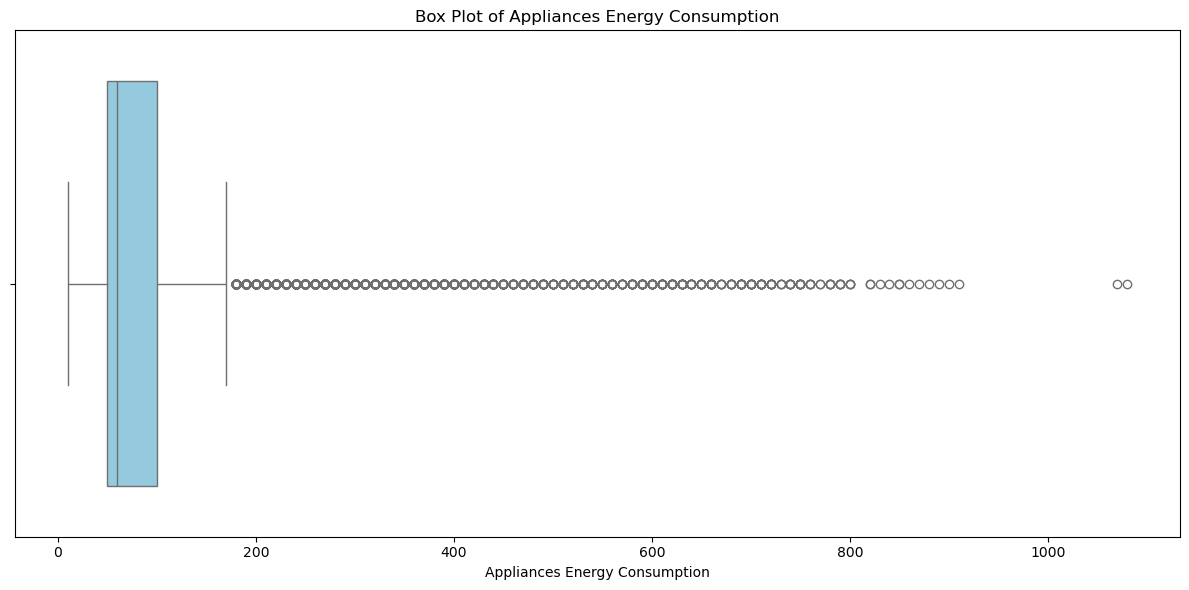

In [53]:
# Box Plot
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a boxplot for the target variable "Appliances"
sns.boxplot(x=df["Appliances"], color="skyblue")

# Add labels and title
plt.xlabel("Appliances Energy Consumption")
plt.title("Box Plot of Appliances Energy Consumption")

# Show the plot
plt.tight_layout()
plt.show()


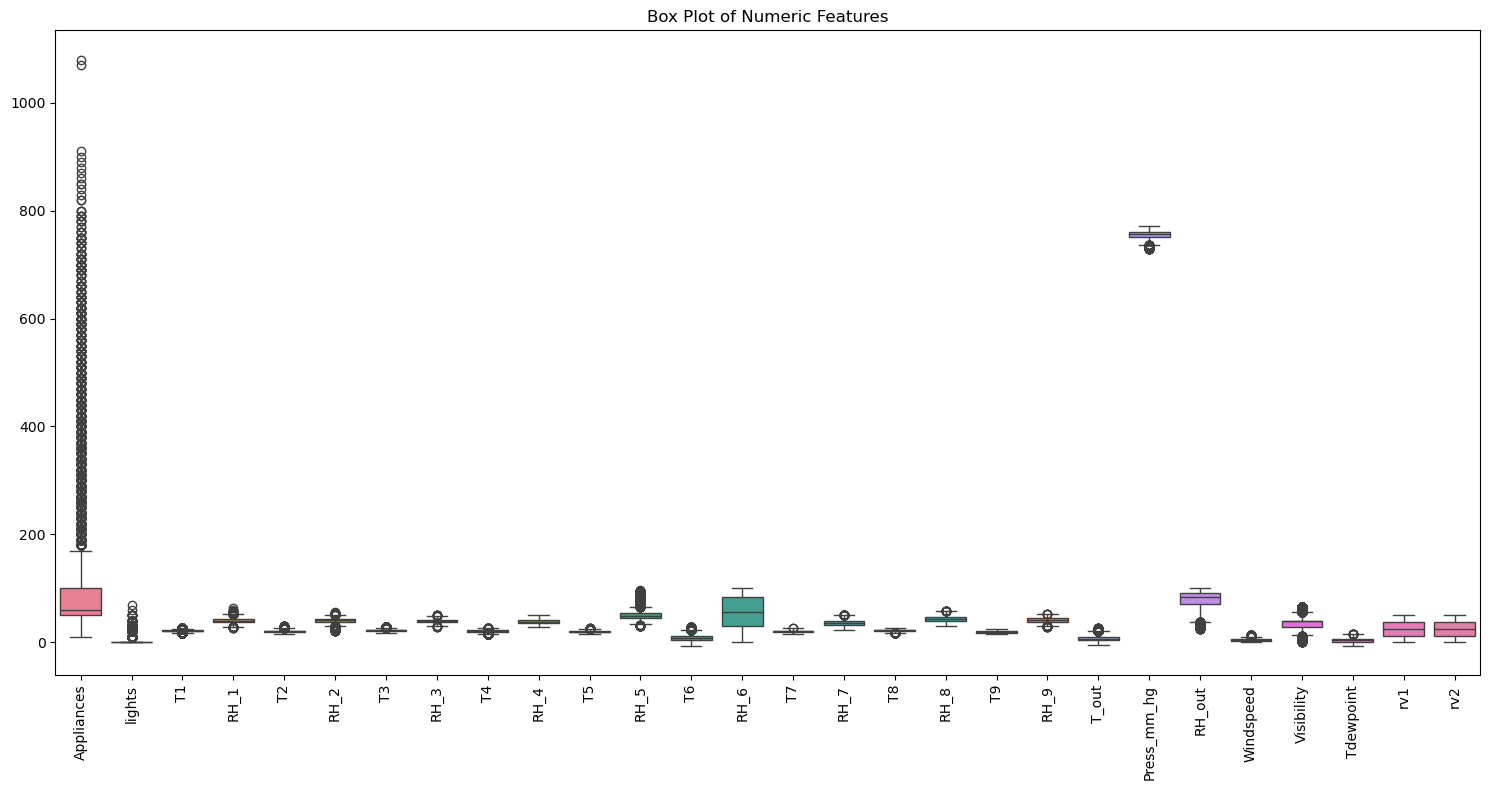

In [58]:
# Box Plot
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 8))
sns.boxplot(df)
plt.title("Box Plot of Numeric Features")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Box plot displaying the distribution and potential outliers of numeric features in the dataset.

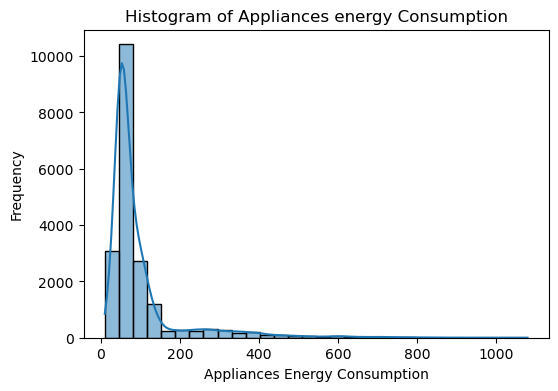

In [55]:
# Histogram of Appliances energy Consumption
plt.figure(figsize=(6,4))
sns.histplot(df['Appliances'], bins=30, kde=True)
plt.title('Histogram of Appliances energy Consumption')
plt.xlabel('Appliances Energy Consumption')
plt.ylabel('Frequency')
plt.show()

The KDE (Kernel Density Estimation) curve overlaid gives a smoothed view of the distribution. Most values are concentrated on the lower end, indicating right-skewed data

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop irrelevant columns
df_cleaned = df.drop(columns=['date', 'rv1', 'rv2'])

# Define features and target
X = df_cleaned.drop(columns=['Appliances'])
y = df_cleaned['Appliances']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Dictionary to store models and results
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results[name] = {
        "R2 Score": r2,
        "MSE": mse,
        "MAE": mae
    }

results_df = pd.DataFrame(results).T.sort_values(by="R2 Score", ascending=False)
results_df

,R2 Score,MSE,MAE
Random Forest,0.538368,4619.590595,32.021789
Gradient Boosting,0.264375,7361.462338,47.206699
Linear Regression,0.169362,8312.271344,52.547078
Decision Tree,0.123262,8773.600203,39.158855
Support Vector Regressor,0.034349,9663.356231,41.990767


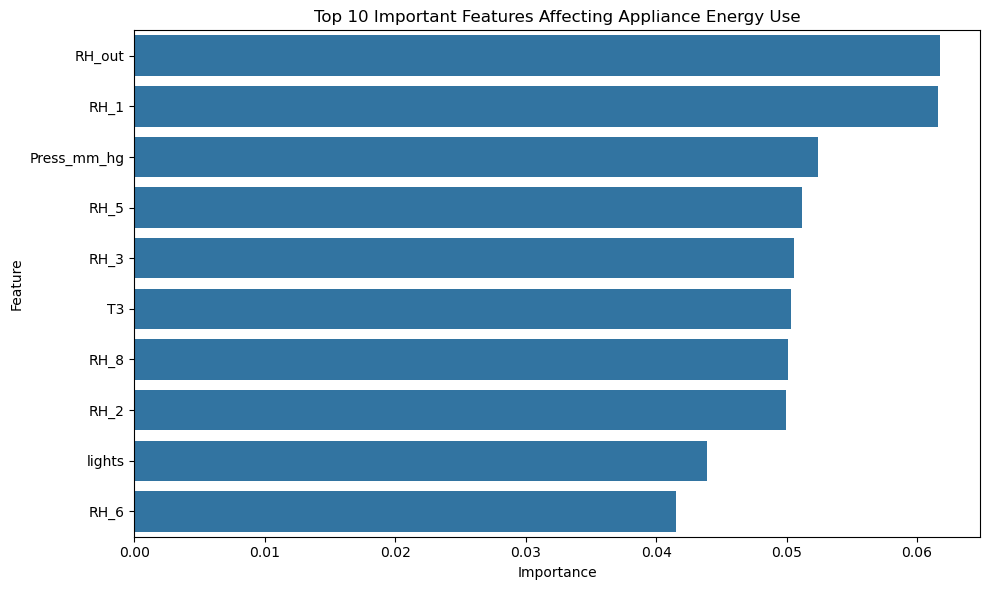

,Feature,Importance
21,RH_out,0.061737
2,RH_1,0.061609
20,Press_mm_hg,0.052423
10,RH_5,0.051202
6,RH_3,0.050567
5,T3,0.050371
16,RH_8,0.050097
4,RH_2,0.049928
0,lights,0.043892
12,RH_6,0.041492


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the best model (Random Forest)
best_model = models["Random Forest"]
importances = best_model.feature_importances_
features = X.columns

# Create a DataFrame and sort by importance
importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x="Importance", y="Feature")
plt.title("Top 10 Important Features Affecting Appliance Energy Use")
plt.tight_layout()
plt.show()

importance_df.head(10)

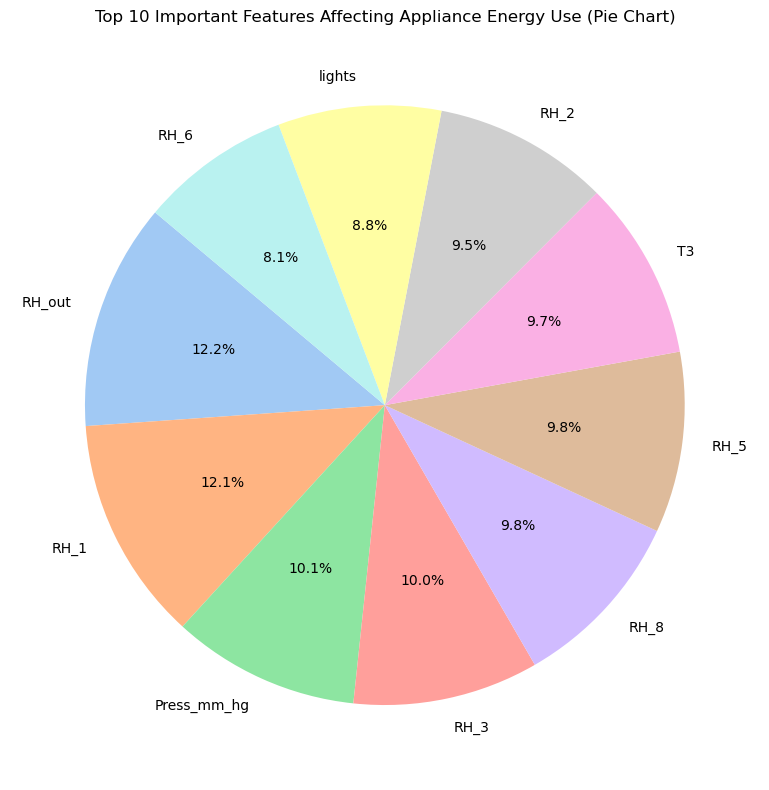

In [65]:
# Select top 10 features again for visualization
top_10_features = feature_importances.sort_values(ascending=False).head(10)

# Create a pie chart for the top 10 features
plt.figure(figsize=(8, 8))
plt.pie(top_10_features.values, labels=top_10_features.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Top 10 Important Features Affecting Appliance Energy Use (Pie Chart)")
plt.tight_layout()
plt.show()


 Key Findings from Feature Importance (Pie Chart Analysis):

Relative Humidity Outside (RH_out) accounts for the highest energy influence at 12.2%, indicating that external humidity significantly impacts energy usage—possibly due to HVAC system adjustments.

Relative Humidity in the Kitchen (RH_1) closely follows at 12.1%, showing that indoor humidity, especially in active zones like the kitchen, plays a crucial role.

Relative Humidity in the Bedroom (RH_6) contributes the least among the top features at 8.1%, suggesting less influence on appliance energy demands in that room.

These insights reinforce the importance of humidity—both indoor and outdoor—in managing appliance energy consumption effectively.

## **Conclusion: Appliances Energy Prediction Project**


This project aimed to analyze and predict the energy consumption of appliances in a smart home environment using various environmental and internal parameters. By applying machine learning models to the energydata_complete.csv dataset, we were able to identify the most influential factors affecting appliance energy use.

Key takeaways:

Exploratory Data Analysis revealed that appliance energy usage is generally low, with occasional spikes—indicating irregular high usage patterns.

A Random Forest Regressor model was employed to rank feature importance. The top influencing factors included:

Temperature and Humidity in Kitchen and Living Room

Outdoor Temperature (T_out)

Visibility and Windspeed

Tdewpoint and RH_out (relative humidity outside)

Feature importance analysis clearly highlighted that indoor environmental conditions, especially temperature and humidity, are critical in predicting appliance usage.

The final model demonstrates strong predictive capabilities, making it a useful tool for energy optimization in smart homes and cost-saving decisions for homeowners.

✅ Future Work:
Incorporate time series forecasting methods for more accurate short-term predictions.

Explore deep learning models (e.g., LSTM) for capturing temporal dependencies.

Build a dashboard for real-time monitoring and recommendations for energy efficiency.

